In [1]:
import numpy as np
import matplotlib.pyplot as plt
# import scipy.io as sio
# from Data import Cases, Polygons, Labels
from digiPath.pim import PIM

# configure the plot sizes
plt.rcParams['figure.figsize'] = [15, 10]

In [2]:
pimObj = PIM(2352, 7)
pimObj.readRGB()
pimObj.readFGmask()

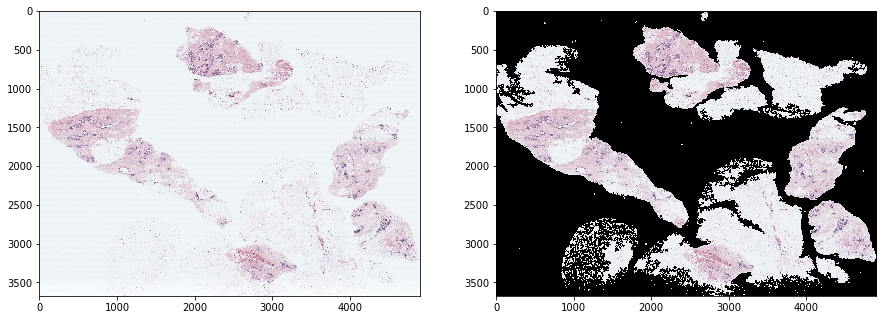

In [3]:
aux = pimObj.RGB.pim.copy()
aux[pimObj.FGmask.pmask == 0] = 0
plt.subplot(121)
pimObj.showRGB()
plt.subplot(122)
plt.imshow(aux)
plt.show()

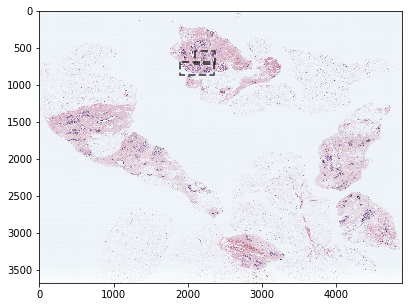

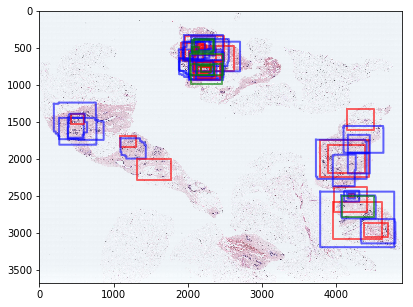

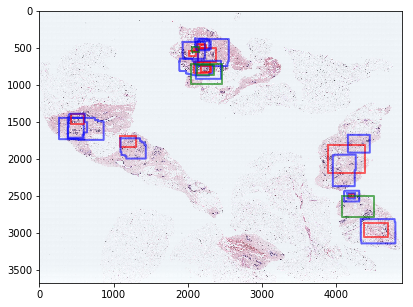

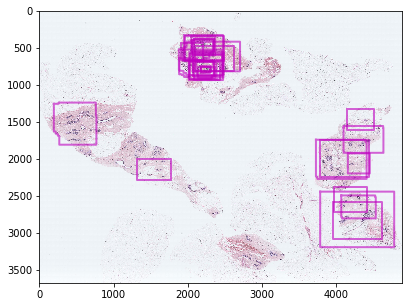

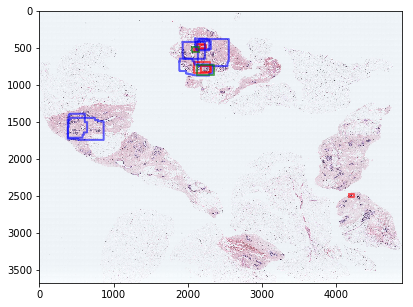

In [4]:
plt.rcParams['figure.figsize'] = [10, 5]
# draw consensus rois 
pimObj.showRGB()
pimObj.drawConsensusROIs(width=2)
plt.show()
# topk = 0 => draw all rois 
pimObj.showRGB()
pimObj.drawSoftROIs(topk=0, width=2)
plt.show()
 # topk = 1 => draw all essential rois 
pimObj.showRGB()
pimObj.drawSoftROIs(topk=1, width=2)
plt.show()
 # topk = -1 => draw all non-essential rois 
pimObj.showRGB()
pimObj.drawSoftROIs(topk=-1, width=2, color='m')
plt.show()
# topk = 15 => draw top 15 essential rois 
pimObj.showRGB()
pimObj.drawSoftROIs(topk=15, width=2) 
plt.show()

In [8]:
numClasses = 4
for expID, expDiags in pimObj.ExpertDiagnoses.items():
    print(expDiags.toString(numClasses), ';', expDiags.diagnoses[numClasses])
print(pimObj.ConsensusDiagnoses.toString(numClasses), ';', pimObj.ConsensusDiagnoses.diagnoses[numClasses])

Expert775 Diagnoses: UDH, Atypical, DCIS ; [1 1 1 0]
Expert776 Diagnoses: DCIS ; [0 0 1 0]
Expert777 Diagnoses: DCIS ; [0 0 1 0]
Consensus Diagnoses: DCIS ; [0 0 1 0]


In [9]:
print(pimObj.ConsensusDiagnoses.toString(14))
print(pimObj.ConsensusDiagnoses.diagnoses[14])

Consensus Diagnoses: DuctalCarcinomaInSitu
[0 0 0 0 0 0 0 0 0 0 0 1 0 0]


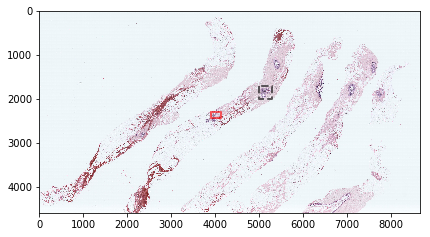

In [11]:
roi_idx = {'soft':2, 'cons':1}
softy = pimObj.SoftROIs[roi_idx['soft']]
consy = pimObj.ConsensusROIs[roi_idx['cons']]
plt.subplot(121)
pimObj.showRGB()
softy.draw(width=2)
consy.draw(width=2)
plt.show()

In [12]:
pim3Obj = PIM(pimObj.pimID, 3)
softy = pim3Obj.SoftROIs[roi_idx['soft']]
consy = pim3Obj.ConsensusROIs[roi_idx['cons']]
softy_rgb  = softy.readFrom(pim3Obj.HE.path)
softy_mask = softy.readFrom(pim3Obj.FGmask.path)
consy_rgb  = consy.readFrom(pim3Obj.HE.path)
consy_mask = consy.readFrom(pim3Obj.FGmask.path)

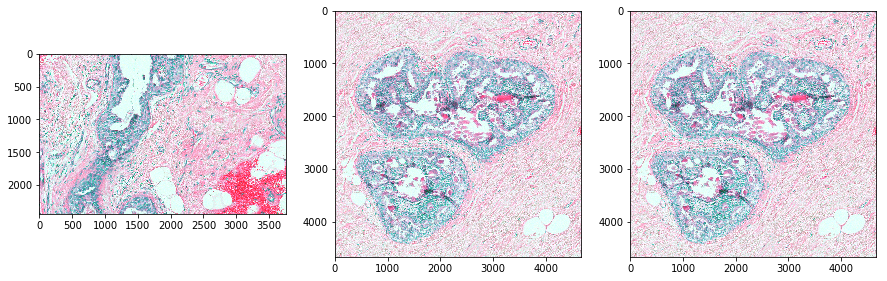

In [13]:
f, axs = plt.subplots(1, 3, sharey=False, sharex=False)
axs[0].imshow(softy_rgb,)
#axs[0].imshow(softy_mask, alpha=0.2)
axs[1].imshow(consy_rgb,)
#axs[1].imshow(consy_mask, alpha=0.2)
background = consy_mask == 0
consy_rgb[background] = 0
axs[2].imshow(consy_rgb)
plt.show()

In [14]:
patch_iter = {}
patch_iter['consensusROI'] = consy.crop(pim3Obj.HE.path, (224, 224), 250)
patch_iter['softROI']      = softy.crop(pim3Obj.HE.path, (224, 224), 250)

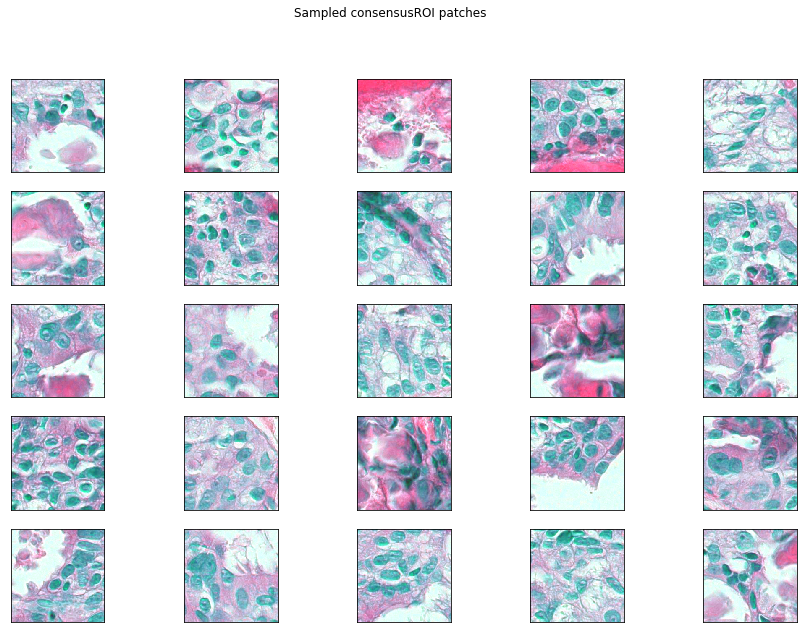

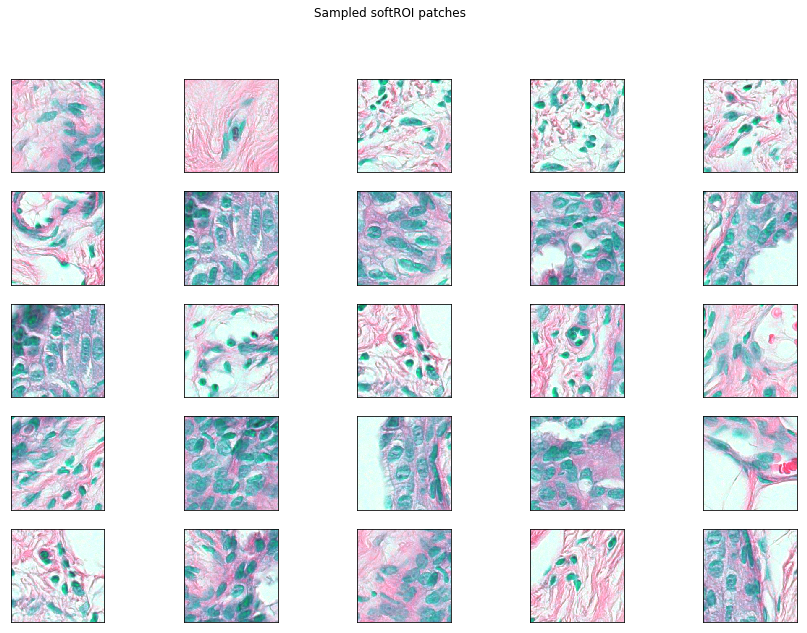

In [15]:
for k,p_iters in patch_iter.items():
    fig, axs_nd = plt.subplots(5, 5)
    for ax_arr in axs_nd:
        for ax in ax_arr:
            ax.imshow((next(p_iters))['img'])
            ax.get_xaxis().set_visible(False)
            ax.get_yaxis().set_visible(False)
    plt.suptitle(f'Sampled {k} patches')
    plt.show()